In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1. Generación de Datos

Simulamos observaciones de una distribución normal. El objetivo es simular como estos datos se verían si los tomaramos de una distribución gaussiana con parámetros desconocidos, pero en un escenario real, estos parámetros serían desconocidos. El objetivo es justamente estimarlos a partir de los datos observados.

In [2]:
np.random.seed(42)
N = 100  
true_mu = 5
true_sigma = 2
x = np.random.normal(loc=true_mu, scale=true_sigma, size=N)

### 2. Definimos el rango de valores de los parámetros $\mu$ y $\sigma^2$

In [3]:
mu_values = np.linspace(0, 10, 100)
sigma_values = np.linspace(0.1, 5, 100)

In [4]:
# Create a grid for mu and sigma
MU, SIGMA = np.meshgrid(mu_values, sigma_values)
LIKELIHOOD = np.zeros(MU.shape)
LOG_LIKELIHOOD = np.zeros(MU.shape)

![alt text](meshgrid.png)

Meshgrid se usa para hacer las operaciones de forma vectorizada. Por ejemplo, nos permite computar el likelihood de cada combinación de $\mu$ y $\sigma$ en un solo bucle.

### 3. Calculamos la función de verosimilitud y log-verosimilitud para diferentes valores de $\mu$ y $\sigma^2$

In [8]:
# Small constant to avoid log(0)
epsilon = 1e-10

# Compute the likelihood function and log-likelihood function
for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        mu = MU[i, j]
        sigma = SIGMA[i, j]
        pdf_values = norm.pdf(x, loc=mu, scale=sigma)
        pdf_values = np.clip(pdf_values, epsilon, None)  # Clip values to avoid zero
        # Calculate the likelihood
        likelihood = np.prod(pdf_values)
        # Calculate the log-likelihood
        log_likelihood = np.sum(np.log(pdf_values))
        LIKELIHOOD[i, j] = likelihood
        LOG_LIKELIHOOD[i, j] = log_likelihood

### 4. Graficamos los datos y la función de verosimiltud

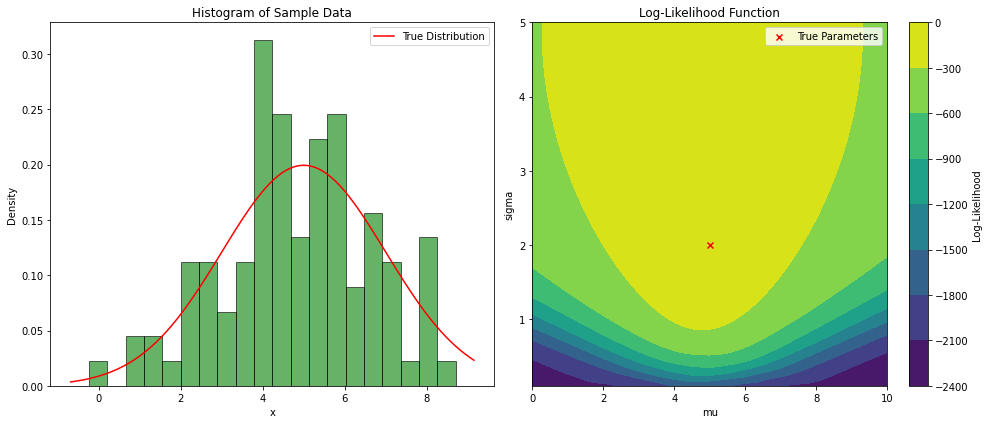

In [20]:
# Plot the sample data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(x, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
plt.plot(x_range, norm.pdf(x_range, loc=true_mu, scale=true_sigma), 'r', label='True Distribution')
plt.title('Histogram of Sample Data')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Plot the likelihood function
plt.subplot(1, 2, 2)
plt.contourf(MU, SIGMA, LOG_LIKELIHOOD, cmap='viridis')
plt.colorbar(label='Log-Likelihood')
plt.scatter(true_mu, true_sigma, color='r', marker='x', label='True Parameters')
plt.title('Log-Likelihood Function')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.legend()

plt.tight_layout()
plt.show()

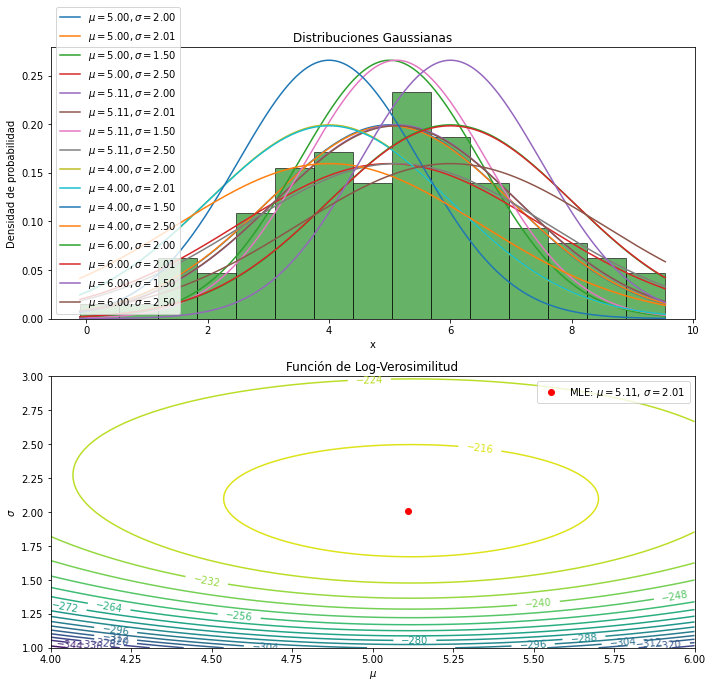

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paso 1: Generar una muestra de datos a partir de una distribución normal
np.random.seed(0)
mu_actual = 5
sigma_actual = 2
data = np.random.normal(mu_actual, sigma_actual, 100)

# Paso 2: Definir la función de verosimilitud
def log_likelihood(mu, sigma, data):
    return np.sum(norm.logpdf(data, mu, sigma))

# Paso 3: Calcular la verosimilitud para diferentes valores de los parámetros
mu_values = np.linspace(4, 6, 100)
sigma_values = np.linspace(1, 3, 100)

log_likelihood_values = np.array([[log_likelihood(mu, sigma, data) for mu in mu_values] for sigma in sigma_values])

# Paso 4: Encontrar el valor de máxima verosimilitud (MLE)
max_idx = np.unravel_index(np.argmax(log_likelihood_values), log_likelihood_values.shape)
mu_mle = mu_values[max_idx[1]]
sigma_mle = sigma_values[max_idx[0]]

# Paso 5: Graficar las curvas de las distribuciones gaussianas
x = np.linspace(min(data), max(data), 1000)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de las distribuciones gaussianas
for mu in [mu_actual, mu_mle, mu_actual-1, mu_actual+1]:
    for sigma in [sigma_actual, sigma_mle, sigma_actual-0.5, sigma_actual+0.5]:
        axs[0].plot(x, norm.pdf(x, mu, sigma), label=f'$\mu={mu:.2f}, \sigma={sigma:.2f}$')
axs[0].hist(data, bins=15, density=True, alpha=0.6, color='g', edgecolor='black')
axs[0].set_title('Distribuciones Gaussianas')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Densidad de probabilidad')
axs[0].legend()

# Gráfico de la función de log-verosimilitud
mu_mesh, sigma_mesh = np.meshgrid(mu_values, sigma_values)
CS = axs[1].contour(mu_mesh, sigma_mesh, log_likelihood_values, levels=20)
axs[1].clabel(CS, inline=1, fontsize=10)
axs[1].set_title('Función de Log-Verosimilitud')
axs[1].set_xlabel('$\mu$')
axs[1].set_ylabel('$\sigma$')
axs[1].plot(mu_mle, sigma_mle, 'ro', label=f'MLE: $\mu={mu_mle:.2f}$, $\sigma={sigma_mle:.2f}$')
axs[1].legend()

plt.tight_layout()
plt.show()

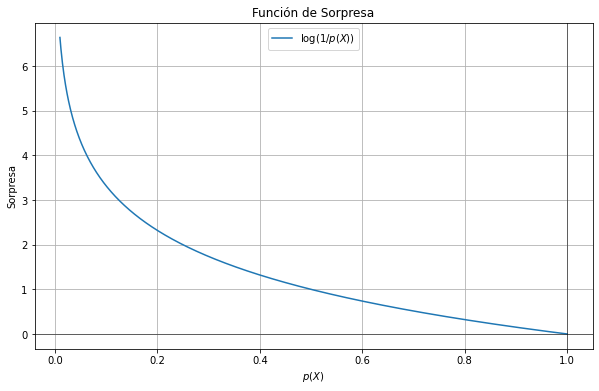

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de sorpresa
def sorpresa(p):
    return np.log2(1 / p)

# Valores de probabilidad entre 0 y 1 (excluyendo 0 para evitar log(0))
p_values = np.linspace(0.01, 1, 1000)
sorpresa_values = sorpresa(p_values)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(p_values, sorpresa_values, label='$\log(1/p(X))$')
plt.xlabel('$p(X)$')
plt.ylabel('Sorpresa')
plt.title('Función de Sorpresa')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(1, color='black',linewidth=0.5)
plt.legend()
plt.show()
